# Single source analysis
Use a saved simulation - could used a saved Datasets when bug will be solved

In [1]:
import gammapy
if (gammapy.__version__ != "0.17"):
    print("Not sure it will work, use Gammapy 0.17 !")

In [2]:
import sys
sys.path.append("../") 
sys.path.append("../../../SoHAPPy") 
from pathlib import Path
import numpy as np

import astropy.units as u
import matplotlib.pyplot as plt
# Bigger texts and labels
#plt.style.use('seaborn-talk')
plt.style.use('seaborn-poster') # Bug with normal x marker !!!

from dataset_tools import createonoff_from_simulation, check_datasets
import dataset_plot as dplt
# Transform warnings into errors - useful to find who is guilty !
import warnings
#warnings.filterwarnings('error')
warnings.filterwarnings('ignore')

# Read data

In [3]:
# Read data from a simulation on disk
folder = r"D:\000_Today\testnew"
#file = "Event3-North.bin" # 4 slices
#file = "Event3-South.bin" # 4 slices
file = "Event85-South.bin" # 4 slices
# file = "Event815-North.bin" # 24 slices
# file = "Event901-North.bin" # 24 slices
# file = "Event398-North.bin" # 24 slices

import pickle
infile  = open(Path(folder,file),"rb")
mc      = pickle.load(infile)
infile.close()

## Create on-off datasets

In [4]:
dset_list = createonoff_from_simulation(mc,debug=False,fake=True)

### Dataset count numbers and flux values at center of bins

In [5]:
check_datasets(dset_list,deeper=True)

 0    South-0-0      6.00 s      37.00       5.00      32.00      27.23   Spec-19 
    34.6  [   30.0,    40.0]       0.00       0.00       0.00       0.00    0     1.57e-09 
    47.4  [   40.0,    56.2]       0.00       0.00       0.00       0.00    0     8.48e-10 
    78.6  [   56.2,   110.0]       8.00       0.00       8.00       8.94    0     2.17e-10 
   139.9  [  110.0,   177.8]      23.00       3.40      19.60      16.45    1     1.46e-11 
   237.1  [  177.8,   316.2]       6.00       1.20       4.80       1.74    1     1.71e-13 
   421.7  [  316.2,   562.3]       0.00       0.40      -0.40       0.10    1     1.70e-16 
   749.9  [  562.3,  1000.0]       0.00       0.00       0.00       0.00    1     1.42e-19 
  1333.5  [ 1000.0,  1778.3]       0.00       0.00       0.00       0.00    1     7.91e-23 
  2371.4  [ 1778.3,  3162.3]       0.00       0.00       0.00       0.00    1     6.31e-28 
  4217.0  [ 3162.3,  5623.4]       0.00       0.00       0.00       0.00    1     7.88e-4

 8    South-8-0    10564.73 s     900.00     925.00     -25.00      10.65   Spec-48 
    34.6  [   30.0,    40.0]       0.00       0.00       0.00       0.00    0     1.99e-12 
    47.4  [   40.0,    56.2]       0.00       0.00       0.00       0.00    0     9.27e-13 
    78.6  [   56.2,   110.0]      21.00      26.00      -5.00       3.03    0     1.98e-13 
   139.9  [  110.0,   177.8]     451.00     456.20      -5.20       6.46    1     1.16e-14 
   237.1  [  177.8,   316.2]     285.00     305.20     -20.20       1.04    1     1.27e-16 
   421.7  [  316.2,   562.3]      97.00      98.00      -1.00       0.12    1     1.26e-19 
   749.9  [  562.3,  1000.0]      30.00      26.60       3.40       0.00    1     1.11e-22 
  1333.5  [ 1000.0,  1778.3]      10.00       7.60       2.40       0.00    1     6.97e-26 
  2371.4  [ 1778.3,  3162.3]       5.00       2.40       2.60       0.00    1     6.36e-31 
  4217.0  [ 3162.3,  5623.4]       1.00       2.40      -1.40       0.00    1     8.93e

## Plot excess/expected counts 
No error bars are plotted

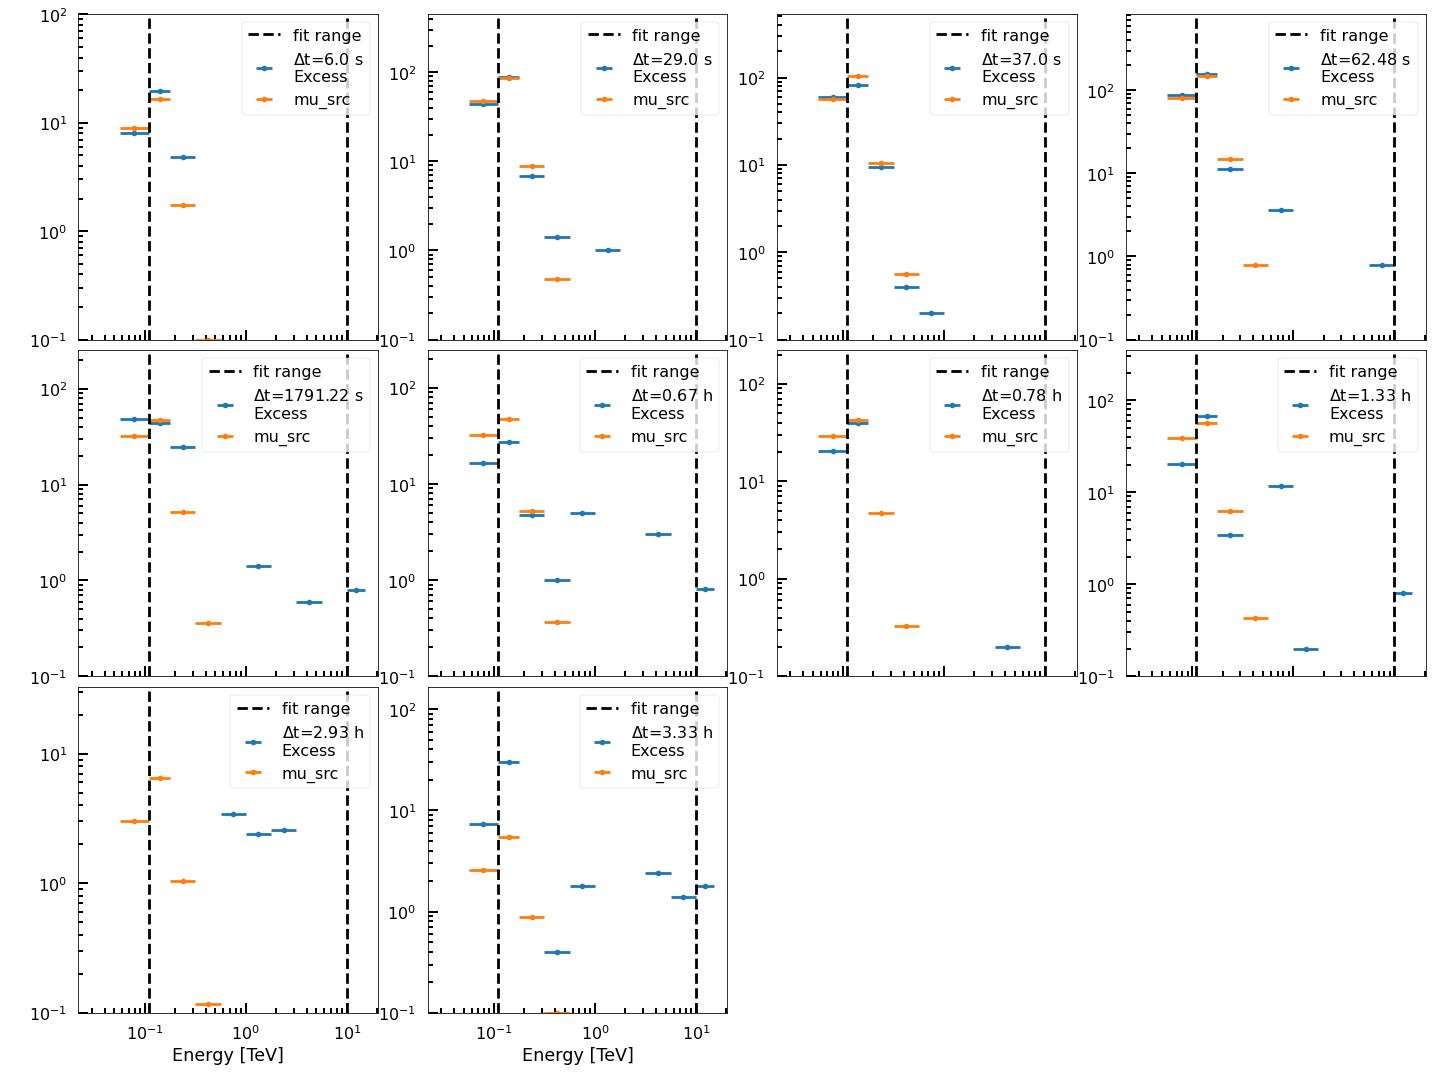

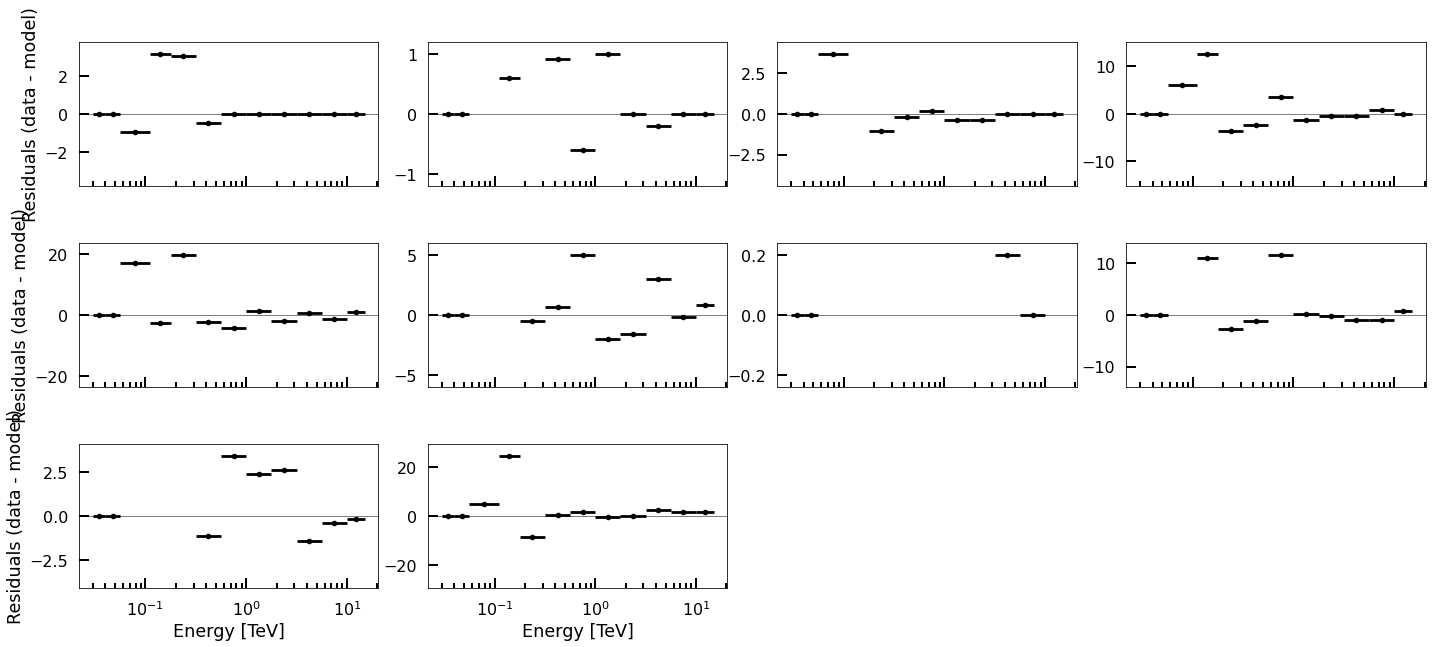

In [9]:
dplt.panels(dset_list,dplt.excess_counts,fixrange=False,ysize=5,nmaxcol=4,xscale="log",yscale="log")
dplt.panels(dset_list,dplt.residuals,ysize=3,nmaxcol=4,yscale="linear")

## Extract the flux from the count numbers

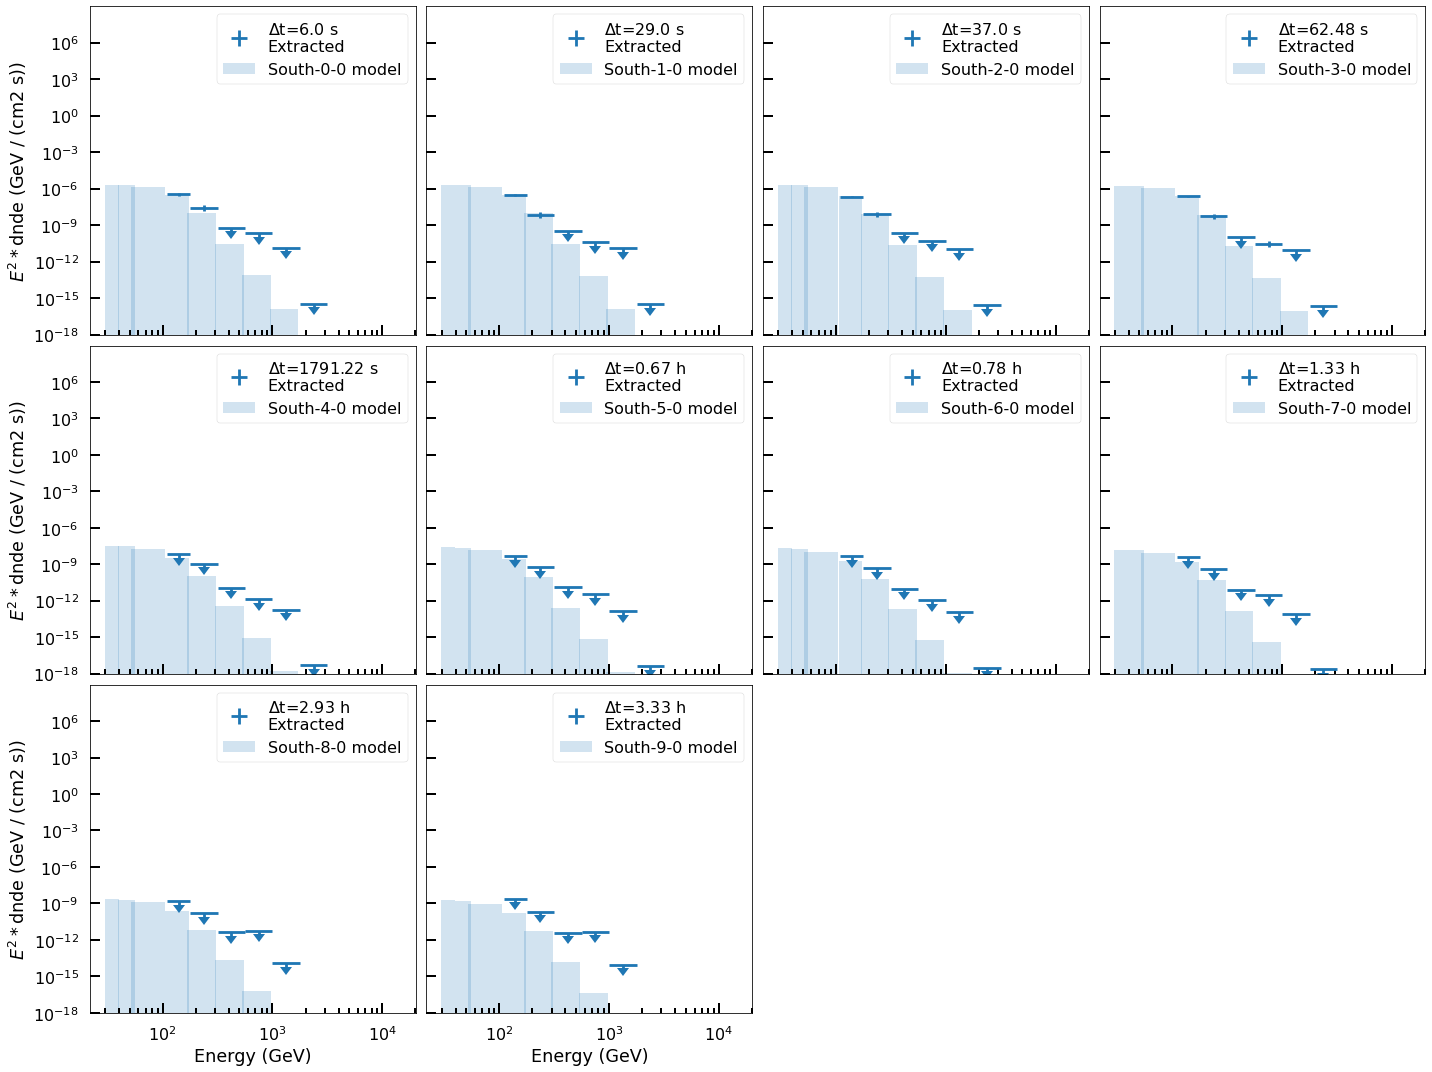

In [11]:
dplt.panels(dset_list,nmaxcol=4, xsize=8, ysize=5, fixrange = True, func=dplt.extracted_spectrum,
           index=2,style="bar")

# Analysis datasets - time evolution

### Excess counts

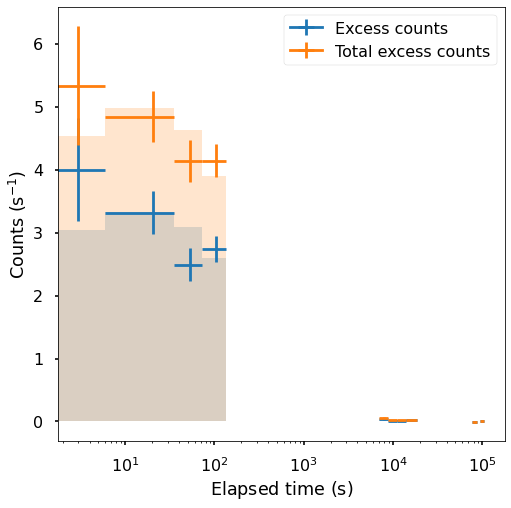

In [15]:
fig,ax = plt.subplots(figsize=(8,8))
dplt.excess_versus_time(dset_list, ax = ax, rate=True, unmasked=True, xscale="log", yscale="linear",debug=False)

## Flux

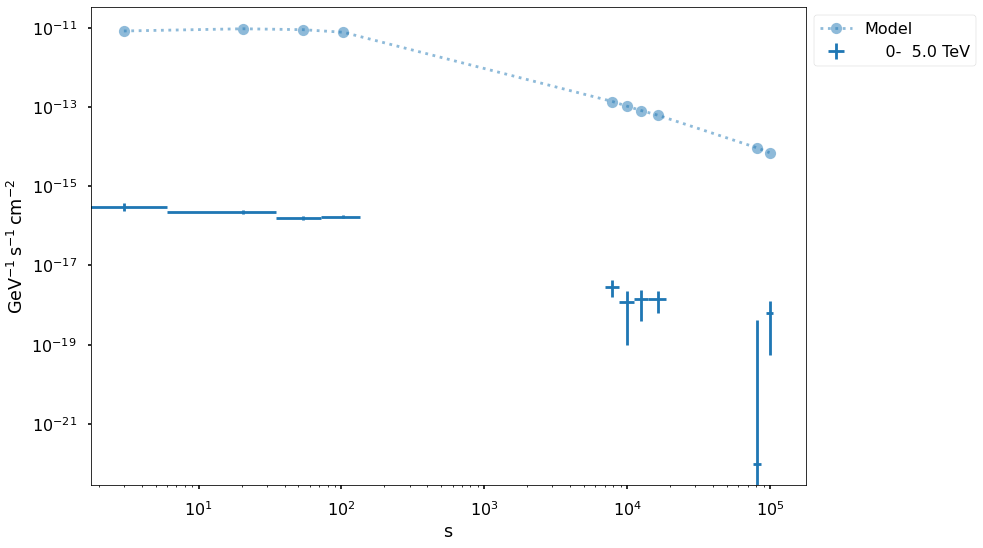

In [17]:
# Plot the flux time evolution for a give range (limited to the reco axis range)
ax = dplt.flux_versus_time(dset_list, emin=10/1000*u.TeV, emax=5*u.TeV,
                     style="line",
                     color="tab:blue",debug=False)
ax.set_yscale("log")
ax.set_xscale("log")

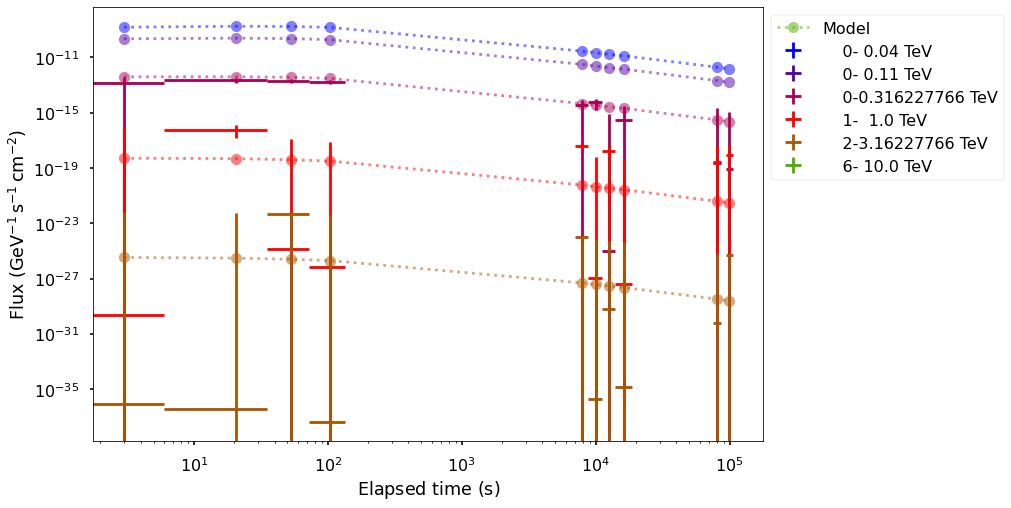

In [5]:
# Plot the flux time evolution fr a series of energy ranges 
dplt.fluxes_versus_time(dset_list,nstep=2,debug=False,xscale="log")

## Lightcurve simulation

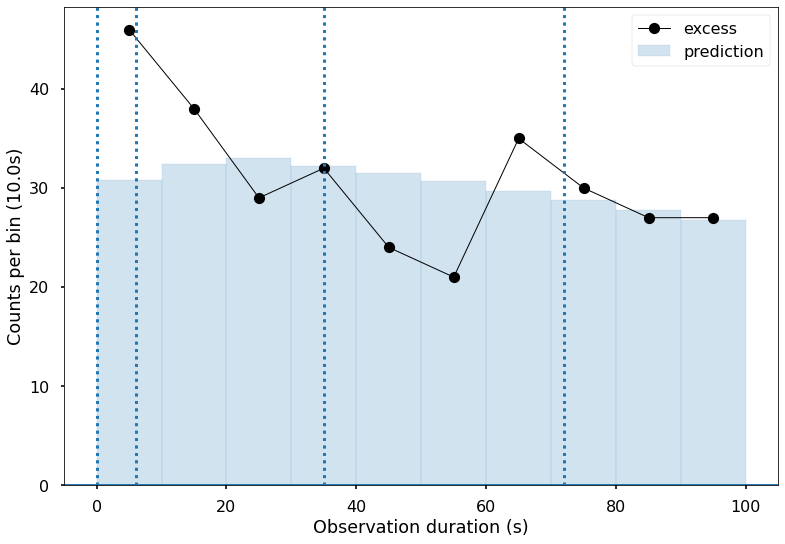

In [23]:
ax = dplt.lightcurve(dset_list,tag="excess",style="line",binwidth=10*u.s,tmax=100*u.s)
dplt.lightcurve(dset_list,tag="prediction",style="bar",color="tab:blue",alpha=0.2,ax=ax,binwidth=10*u.s,tmax=100*u.s)

# <font color="red">CHECK THIS</font>

In [ ]:
livetimes = np.asarray([ds.livetime.value for ds in dset_list]) # Measurement end of period
livetimes = np.append(np.asarray(0),livetimes) # Add zero to times
counts = np.asarray([ds.excess.data[ds.mask_safe].sum() for ds in dset_list]) # Measurement end of period
tmeas = []
tbin=[]
errt = []
t_elapsed = 0
for i,dt in enumerate(livetimes):
    tbin.append(t_elapsed + 0.5*dt)
    t_elapsed += dt
    errt.append(0.5*dt)
    tmeas.append(t_elapsed)

In [ ]:
fig, ax = plt.subplots(nrows=1,ncols=1, figsize=(10,5))
ax.errorbar(tbin[1:],counts,xerr=errt[1:],yerr=np.sqrt(counts),marker="+",ls="",color="black") # measurement points
ax.plot(tmeas[1:],counts,marker="o",color="red",ls="") # measurement points

# Check cumulated statistics
Note that flux stacking is not possible form the dataset stacking methods

In [ ]:
from dataset_tools import stacking
dset_stacked = stacking(dset_list)

## Cumulated counts

In [ ]:
check_datasets(dset_stacked,masked=False,deeper=True)

In [ ]:
dplt.panels(dset_stacked,dplt.excess_counts,fixrange=True,ysize=7,nmaxcol=4,xscale="log",yscale="log",stacked=True)
# residuals have no sense here !

In [ ]:
dplt.panels(dset_stacked,dplt.extracted_spectrum,
           fixrange=True,ysize=7,nmaxcol=4,xscale="log",yscale="log",theory=True)

## Cumulated counts versus time

In [ ]:
dplt.stacked_versus_time(dset_stacked,dsets=dset_list, rate=False,xscale="log",yscale="log")

# <font color="red">Check this</font>

In [ ]:
# Counts versus time and energy
counts_versus_E_and_time(ds_stacked)

In [ ]:
flux_unit="GeV-1 cm-2 s-1"
e_unit="GeV"
index = 2
x = 3*u.Unit("TeV-1 cm-2 s-1")*(1*u.TeV)**2
x

In [ ]:
x.to(flux_unit*e_unit**2)